# Quiz game

In [2]:
import pandas as pd # type: ignore
import os # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
import random # type: ignore
import time # type: ignore
import matplotlib # type: ignore
from matplotlib import pyplot as plt # type: ignore
from collections import Counter # type: ignore
import geopandas as gpd # type: ignore

In [3]:
dataset = 'https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset/data'

od.download(dataset)

Skipping, found downloaded files in ".\imdb-dataset" (use force=True to force download)


In [4]:
data_dir = './imdb-dataset'

In [5]:
os.listdir(data_dir)

['name.basics.tsv',
 'title.akas.tsv',
 'title.basics.tsv',
 'title.principals.tsv',
 'title.ratings.tsv']

# role dataset

In [6]:
roles_df = pd.read_table('./imdb-dataset/name.basics.tsv', sep='\t')

In [7]:
roles_df.replace('\\N', np.nan, inplace=True)

In [8]:
roles_df.dropna(inplace=True)

In [9]:
roles_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,"tt12423242,tt12276534,tt2073912,tt2314629"
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,"tt2265239,tt10250040,tt26921560,tt0179586"
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,"tt4248510,tt2191567"
13843554,nm9993435,William Riva,1919,1999,set_decorator,"tt0300836,tt0189339"


In [10]:
roles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190801 entries, 0 to 13843555
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   nconst             190801 non-null  object
 1   primaryName        190801 non-null  object
 2   birthYear          190801 non-null  object
 3   deathYear          190801 non-null  object
 4   primaryProfession  190801 non-null  object
 5   knownForTitles     190801 non-null  object
dtypes: object(6)
memory usage: 10.2+ MB


In [11]:
roles_df[['first_profession', 'second_profession', 'third_profession']] = roles_df['primaryProfession'].str.split(',', expand=True)

In [12]:
roles_df = roles_df.drop(['primaryProfession'], axis = 1)

In [13]:
roles_df[['movie_1', 'movie_2', 'movie_3', 'movie_4']] = roles_df['knownForTitles'].str.split(',', expand=True)

In [14]:
roles_df = roles_df.drop(['knownForTitles'], axis = 1)

In [15]:
roles_df

,nconst,primaryName,birthYear,deathYear,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


In [16]:
roles_df = roles_df.rename(columns={'nconst': 'name_id',
                                    'primaryName': 'name_surname',
                                    'birthYear': 'birth',
                                    'deathYear': 'death'})

In [17]:
roles_df

,name_id,name_surname,birth,death,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


# movie dataset

In [18]:
movie_df = pd.read_table('./imdb-dataset/title.basics.tsv', sep='\t')

C:\Users\adepa\AppData\Local\Temp\ipykernel_6104\867109283.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_df = pd.read_table('./imdb-dataset/title.basics.tsv', sep='\t')


In [19]:
movie_df.replace('\\N', np.nan, inplace=True)

In [20]:
movie_df.dropna(inplace=True)

In [21]:
movie_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
37597,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1955,15,Talk-Show
38431,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show"
38432,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family
38434,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama
38436,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0,1947,1951,20,"Crime,Drama,Mystery"
...,...,...,...,...,...,...,...,...,...
11123425,tt9915114,tvSeries,Touche pas à mon sport,Touche pas à mon sport,0,2015,2016,65,"Sport,Talk-Show"
11123434,tt9915138,tvSeries,Scandalous,Scandalous,0,2018,2019,60,"Crime,Documentary"
11123525,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy
11123731,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2020,20,Fantasy


In [22]:
movie_df[['genre_1', 'genre_2', 'genre_3']] = movie_df['genres'].str.split(',', expand=True)

In [23]:
movie_df  = movie_df.drop(['genres'], axis = 1)

In [24]:
movie_df = movie_df.rename(columns = {'tconst': 'movie_id',
                                      'titleType': 'type',
                                      'primaryTitle': 'title',
                                      'originalTitle': 'original_title',
                                      'isAdult': 'adult',
                                      'startYear': 'start_year',
                                      'endYear': 'end_year',
                                      'runtimeMinutes': 'minutes_runtimes'})

# region dataset

In [25]:
region_df = pd.read_table('./imdb-dataset/title.akas.tsv', sep='\t', usecols=['titleId', 'region'])

In [26]:
region_df.replace('\\N', np.nan, inplace=True)

In [27]:
region_df.dropna(inplace=True)

In [28]:
region_df

,titleId,region
1,tt0000001,DE
2,tt0000001,US
3,tt0000001,HU
4,tt0000001,GR
5,tt0000001,RU
...,...,...
49868811,tt9916852,IT
49868812,tt9916852,DE
49868813,tt9916852,JP
49868814,tt9916852,ES


# merge dataset

In [29]:
roles_df

,name_id,name_surname,birth,death,first_profession,second_profession,third_profession,movie_1,movie_2,movie_3,movie_4
0,nm0000001,Fred Astaire,1899,1987,actor,miscellaneous,producer,tt0072308,tt0050419,tt0053137,tt0027125
1,nm0000002,Lauren Bacall,1924,2014,actress,soundtrack,archive_footage,tt0037382,tt0075213,tt0117057,tt0038355
3,nm0000004,John Belushi,1949,1982,actor,writer,music_department,tt0072562,tt0077975,tt0080455,tt0078723
4,nm0000005,Ingmar Bergman,1918,2007,writer,director,actor,tt0050986,tt0083922,tt0050976,tt0069467
5,nm0000006,Ingrid Bergman,1915,1982,actress,producer,soundtrack,tt0034583,tt0036855,tt0038109,tt0038787
...,...,...,...,...,...,...,...,...,...,...,...
13841569,nm9990804,Gilbert Lascault,1934,2022,writer,None,None,tt12423242,tt12276534,tt2073912,tt2314629
13842212,nm9991745,Dorothy Dorow,1931,2018,music_department,None,None,tt2265239,tt10250040,tt26921560,tt0179586
13843547,nm9993426,Nick 'Duffy' Fudge,1989,2018,archive_footage,None,None,tt4248510,tt2191567,None,None
13843554,nm9993435,William Riva,1919,1999,set_decorator,None,None,tt0300836,tt0189339,None,None


In [30]:
movie_df

,movie_id,type,title,original_title,adult,start_year,end_year,minutes_runtimes,genre_1,genre_2,genre_3
37597,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1955,15,Talk-Show,None,None
38431,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,Family,Game-Show,None
38432,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family,None,None
38434,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,None,None
38436,tt0039125,tvSeries,Public Prosecutor,Public Prosecutor,0,1947,1951,20,Crime,Drama,Mystery
...,...,...,...,...,...,...,...,...,...,...,...
11123425,tt9915114,tvSeries,Touche pas à mon sport,Touche pas à mon sport,0,2015,2016,65,Sport,Talk-Show,None
11123434,tt9915138,tvSeries,Scandalous,Scandalous,0,2018,2019,60,Crime,Documentary,None
11123525,tt9915338,tvSeries,Aunty Donna: Camp Bush Camp!,Aunty Donna: Camp Bush Camp!,0,2018,2018,5,Comedy,None,None
11123731,tt9915822,tvSeries,Ichhapyaari Naagin,Ichhapyaari Naagin,0,2016,2020,20,Fantasy,None,None


In [31]:
region_df

,titleId,region
1,tt0000001,DE
2,tt0000001,US
3,tt0000001,HU
4,tt0000001,GR
5,tt0000001,RU
...,...,...
49868811,tt9916852,IT
49868812,tt9916852,DE
49868813,tt9916852,JP
49868814,tt9916852,ES


In [32]:
merge_set1 = pd.merge(roles_df, movie_df, left_on='movie_1', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'name_id'], axis = 1)

In [33]:
merge_set2 = pd.merge(roles_df, movie_df, left_on='movie_2', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'name_id'], axis = 1)

In [34]:
merge_set3 = pd.merge(roles_df, movie_df, left_on='movie_3', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'name_id'], axis = 1)

In [35]:
merge_set4 = pd.merge(roles_df, movie_df, left_on='movie_4', right_on='movie_id').drop(
    ['movie_1', 'movie_2', 'movie_3', 'movie_4', 'name_id'], axis = 1)

In [36]:
merge_set = pd.concat([merge_set1, merge_set2, merge_set3, merge_set4])

In [37]:
merge_set = pd.merge(merge_set, region_df, left_on='movie_id', right_on='titleId').drop(['movie_id', 'titleId'], axis = 1)

In [38]:
merge_set

,name_surname,birth,death,first_profession,second_profession,third_profession,type,title,original_title,adult,start_year,end_year,minutes_runtimes,genre_1,genre_2,genre_3,region
0,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery,GB
1,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery,HU
2,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery,ID
3,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery,IE
4,Peter Falk,1927,2011,actor,producer,director,tvSeries,Columbo,Columbo,0,1971,1978,100,Crime,Drama,Mystery,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064282,Ömer Karanlik,1958,2023,actor,None,None,tvSeries,Afili Ask,Afili Ask,0,2019,2020,120,Comedy,Romance,None,FR
1064283,Faisal Bu Ghazi,1957,2023,actor,None,None,tvSeries,Om Al Banat,Om Al Banat,0,2009,2009,45,Drama,None,None,KW
1064284,Gilbert Lascault,1934,2022,writer,None,None,tvSeries,Le cercle de minuit,Le cercle de minuit,0,1992,1999,100,Talk-Show,None,None,DE
1064285,Gilbert Lascault,1934,2022,writer,None,None,tvSeries,Le cercle de minuit,Le cercle de minuit,0,1992,1999,100,Talk-Show,None,None,FR


In [39]:
merge_set['type'] = merge_set['type'].replace({'tvSeries': 'tv series', 'tvMiniSeries': 'tv mini Series'})

In [40]:
merge_set['first_profession'] = merge_set['first_profession'].str.replace('_', ' ')

In [41]:
merge_set['first_profession'].unique()

array(['actor', 'actress', 'writer', 'producer', 'music artist', 'editor',
       'director', 'assistant director', 'cinematographer',
       'editorial department', 'casting director', 'composer',
       'sound department', 'music department', 'miscellaneous',
       'animation department', 'archive footage', 'production manager',
       'costume designer', 'make up department', 'art director',
       'camera department', 'casting department', 'art department',
       'script department', 'set decorator', 'costume department',
       'stunts', 'special effects', 'production designer', 'soundtrack',
       'visual effects', 'location management', 'archive sound',
       'podcaster', 'talent agent', 'transportation department', 'legal',
       'executive', 'publicist', 'manager'], dtype=object)

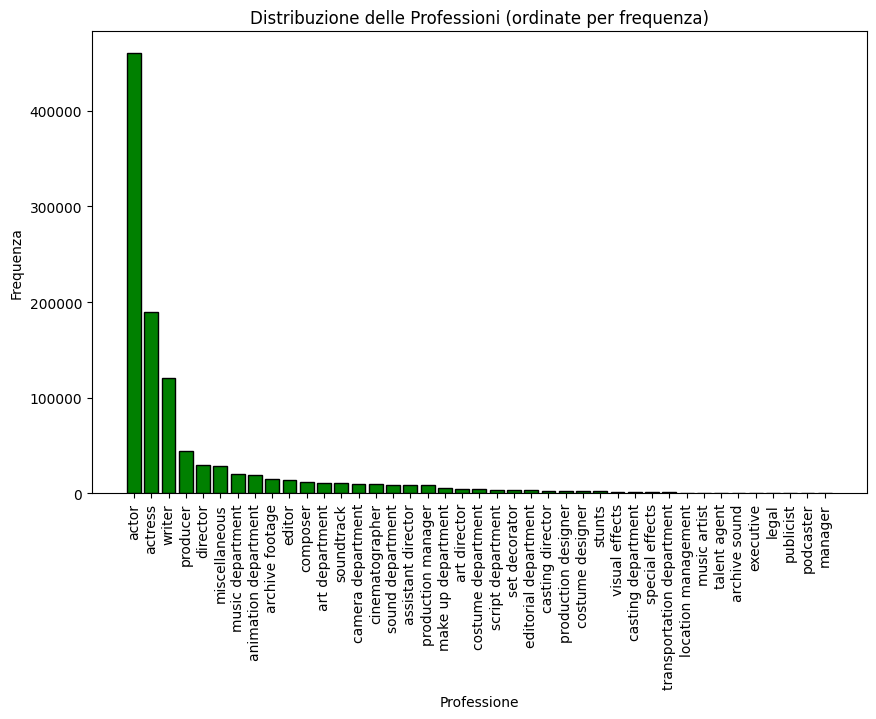

In [42]:
profession_counts = Counter(merge_set['first_profession'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('Distribuzione delle Professioni (ordinate per frequenza)')
plt.xlabel('Professione')
plt.ylabel('Frequenza')
plt.xticks(rotation=90)
plt.show()

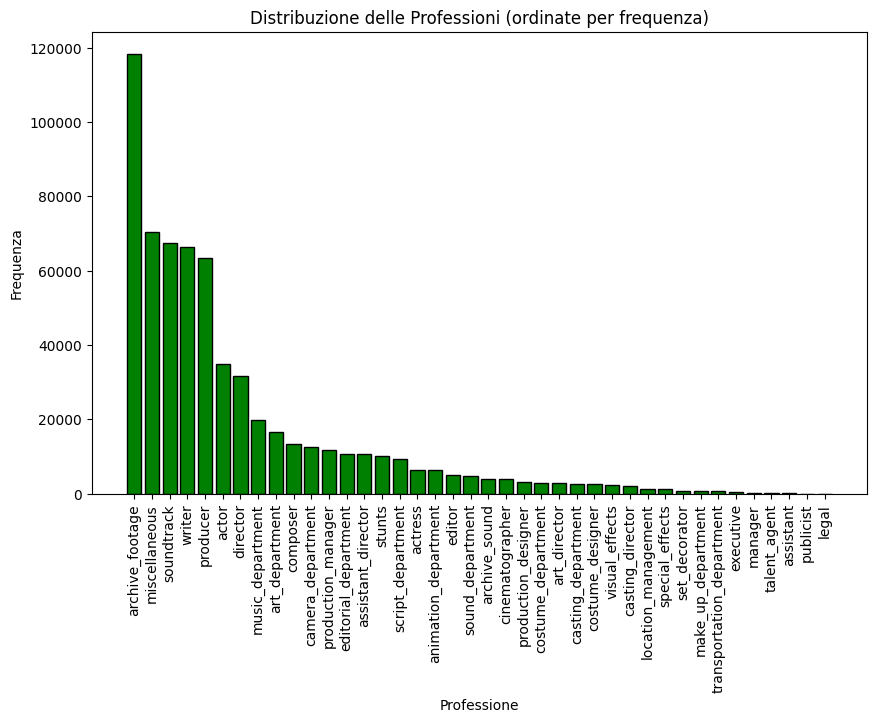

In [43]:
profession_counts = Counter(merge_set['second_profession'].dropna(how='any'))

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('Distribuzione delle Professioni (ordinate per frequenza)')
plt.xlabel('Professione')
plt.ylabel('Frequenza')
plt.xticks(rotation=90)
plt.show()

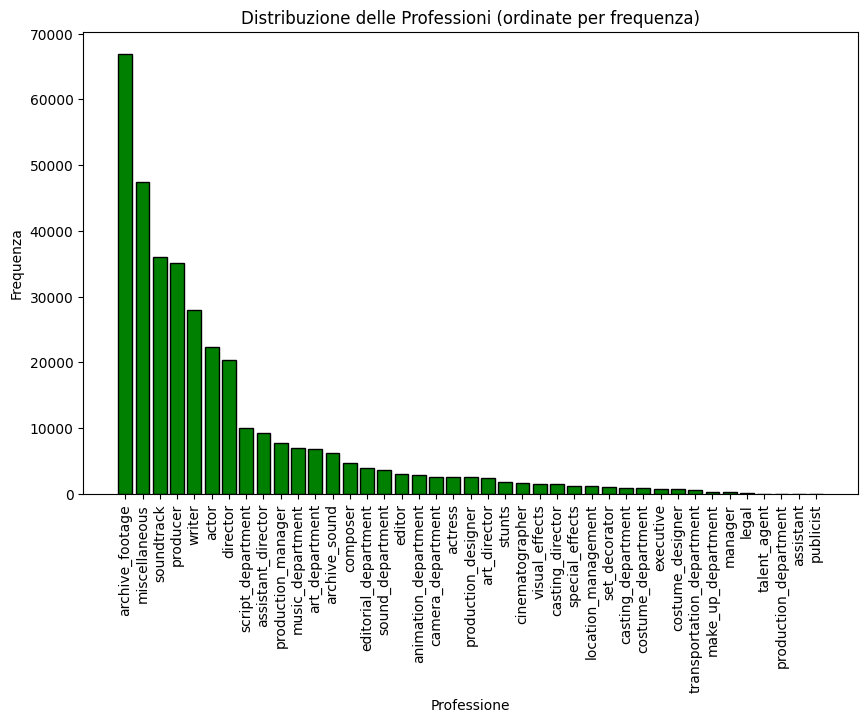

In [44]:
profession_counts = Counter(merge_set['third_profession'].dropna(how='any'))

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('Distribuzione delle Professioni (ordinate per frequenza)')
plt.xlabel('Professione')
plt.ylabel('Frequenza')
plt.xticks(rotation=90)
plt.show()

In [45]:
counries_counts = Counter(merge_set['region'].dropna(how='any'))

df = pd.DataFrame({'country': list(counries_counts.keys()), 'frequency': list(counries_counts.values())})

In [46]:
df['country'].unique()

array(['GB', 'HU', 'ID', 'IE', 'IL', 'IN', 'KR', 'MX', 'NL', 'AE', 'NZ',
       'PE', 'PH', 'PL', 'RO', 'SE', 'SG', 'TH', 'TR', 'US', 'AU', 'XWG',
       'ZA', 'RU', 'SUHH', 'UA', 'ES', 'IT', 'FI', 'BR', 'GR', 'RS', 'JP',
       'TW', 'CA', 'DE', 'EC', 'FR', 'AR', 'UY', 'VE', 'PT', 'CR', 'HK',
       'DK', 'NO', 'HR', 'LT', 'LV', 'BG', 'EG', 'SI', 'CL', 'SK', 'AZ',
       'UZ', 'CZ', 'KZ', 'XWW', 'XYU', 'IR', 'MK', 'VN', 'EE', 'GE', 'AT',
       'BE', 'IS', 'AL', 'BA', 'MD', 'CH', 'CN', 'XKO', 'CSHH', 'BY',
       'LU', 'CO', 'XSA', 'DDDE', 'YUCS', 'DO', 'XAS', 'XEU', 'JM', 'CU',
       'BD', 'TN', 'LB', 'MC', 'MY', 'PK', 'BF', 'CI', 'MA', 'CSXX', 'ME',
       'GT', 'PA', 'PY', 'BO', 'NG', 'XKV', 'PR', 'DZ', 'SA', 'IQ', 'KG',
       'MZ', 'LK', 'TJ', 'MN', 'AF', 'AM', 'SY', 'KW', 'LI', 'CY', 'QA',
       'XPI', 'MT', 'KP', 'CG', 'CM'], dtype=object)

In [63]:
world_data = gpd.read_file("map/ne_110m_admin_0_countries.shp")

In [48]:
world_data['ISO_A2'].unique()

array(['FJ', 'TZ', 'EH', 'CA', 'US', 'KZ', 'UZ', 'PG', 'ID', 'AR', 'CL',
       'CD', 'SO', 'KE', 'SD', 'TD', 'HT', 'DO', 'RU', 'BS', 'FK', '-99',
       'GL', 'TF', 'TL', 'ZA', 'LS', 'MX', 'UY', 'BR', 'BO', 'PE', 'CO',
       'PA', 'CR', 'NI', 'HN', 'SV', 'GT', 'BZ', 'VE', 'GY', 'SR', 'EC',
       'PR', 'JM', 'CU', 'ZW', 'BW', 'NA', 'SN', 'ML', 'MR', 'BJ', 'NE',
       'NG', 'CM', 'TG', 'GH', 'CI', 'GN', 'GW', 'LR', 'SL', 'BF', 'CF',
       'CG', 'GA', 'GQ', 'ZM', 'MW', 'MZ', 'SZ', 'AO', 'BI', 'IL', 'LB',
       'MG', 'PS', 'GM', 'TN', 'DZ', 'JO', 'AE', 'QA', 'KW', 'IQ', 'OM',
       'VU', 'KH', 'TH', 'LA', 'MM', 'VN', 'KP', 'KR', 'MN', 'IN', 'BD',
       'BT', 'NP', 'PK', 'AF', 'TJ', 'KG', 'TM', 'IR', 'SY', 'AM', 'SE',
       'BY', 'UA', 'PL', 'AT', 'HU', 'MD', 'RO', 'LT', 'LV', 'EE', 'DE',
       'BG', 'GR', 'TR', 'AL', 'HR', 'CH', 'LU', 'BE', 'NL', 'PT', 'ES',
       'IE', 'NC', 'SB', 'NZ', 'AU', 'LK', 'CN', 'CN-TW', 'IT', 'DK',
       'GB', 'IS', 'AZ', 'GE', 'PH', 'MY', 'BN', 'SI'

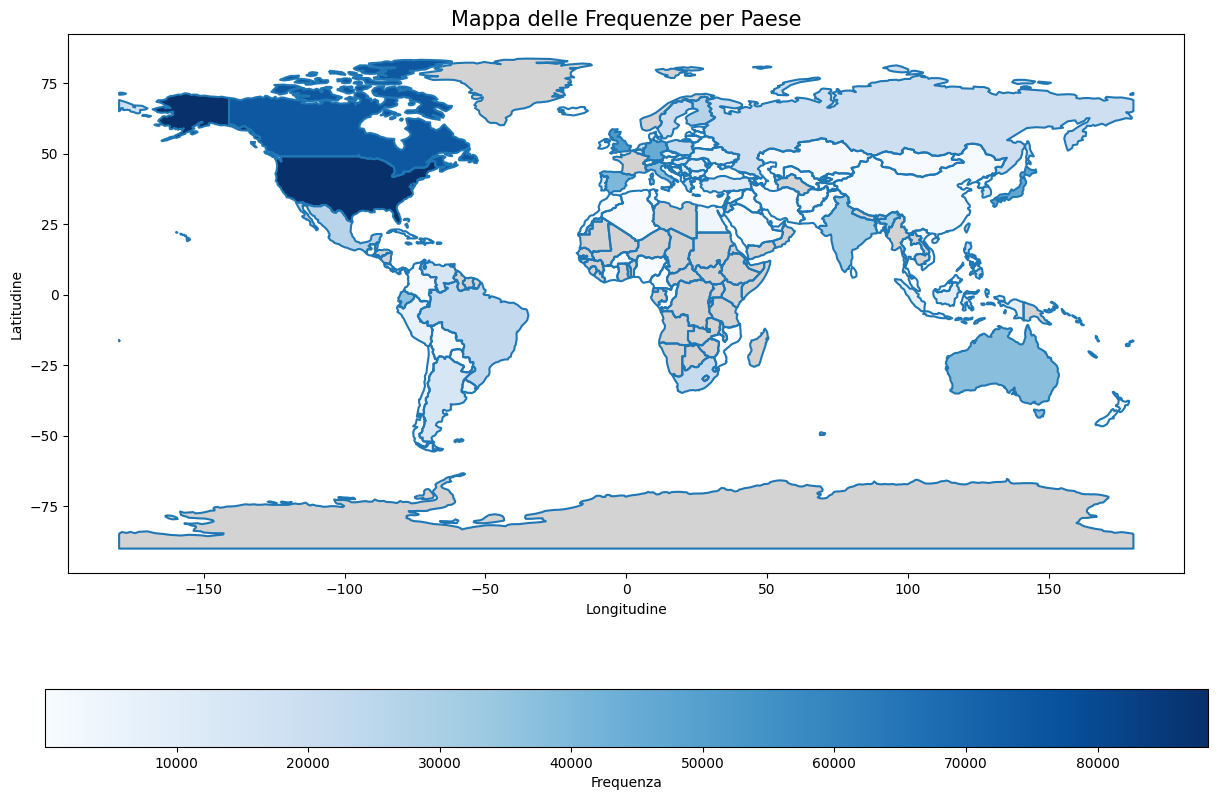

In [49]:
merged = world_data.set_index('ISO_A2').join(df.set_index('country'), how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax)  
merged.plot(column='frequency', ax=ax, legend=True,
            legend_kwds={'label': "Frequenza",
                         'orientation': "horizontal"},
            cmap='Blues', missing_kwds={"color": "lightgrey"})

plt.title('Mappa delle Frequenze per Paese', fontsize=15)
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.show()

# quiz

In [50]:
merge_set['start_year'] = pd.to_numeric(merge_set['start_year'], errors='coerce').fillna(0).astype(int)

In [51]:
def difficulty(set):
    while True:
        dif = str(input('choose the difficulty between easy, medium and hard')).lower()
        
        if dif not in ['hard', 'medium', 'easy']:
            print("please insert a proper difficulty between: 'hard' - 'medium' - 'easy'")
        else: 
            if dif == 'hard':
                set = set[(set['start_year'] < 1960) & (set['region'] != 'US')] 
                print('rules: +1 if you are correct, -1 otherwise')
            elif dif == 'medium':
                set = set[(set['start_year'] > 1961) & (set['start_year'] < 1980) & (set['region'] == 'US')]
                print('rules: +1 if you are correct, -0.5 oherwise')
            elif dif == 'easy':
                set = set[(set['start_year'] > 1981) & (set['region'] == 'US')]
                print('+1 if you are correct, 0 otherwise')
            
            return set, dif

In [52]:
def first_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    title = set['title'].iloc[indices]
    region = set['region'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['start_year'].iloc[indices]
    question = f"in which year was '{title}' made in {region} of {name_surname} as a {role} produced ?"
    
    return question, correct_answer    

In [53]:
def second_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    title = set['title'].iloc[indices]
    region = set['region'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['genre_1'].iloc[indices]
    question = f"what genre is '{title}' made in {region} of {name_surname} as a {role} ?"
    
    return question, correct_answer    

In [54]:
def third_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    movie_type = set['type'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['title'].iloc[indices]
    
    question = f"what was the title of the {movie_type} with {name_surname} as a {role} ?"
    
    return question, correct_answer    

In [55]:
def fourth_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    movie_type = set['type'].iloc[indices]
    title = set['title'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['name_surname'].iloc[indices]
    
    question = f"who was the {role} of the {movie_type} named '{title}'  ?"
    
    return question, correct_answer    

In [56]:
def score_fun(score, my_answer, correct_answer, dif):

    if my_answer == correct_answer:
        score += 1
        print(f'your answer was {my_answer} and the correct one is {correct_answer}')
        print(f'your current score is: {score}')
    else:
        print(f'your answer was {my_answer} but the correct one is {correct_answer}')
        if dif == 'hard':
            score -= 1
        elif dif == 'medium':
            score -= 0.5

        if score < 0:
            score = 0
        print(f'your current score is: {score}')

    return score

In [57]:
def gen_answers(correct_answer):
    if correct_answer in merge_set['start_year'].values:
        incorrect_ans = [correct_answer - random.choice([2,4,6,8]), 
                         correct_answer - random.choice([1,3,5,7,9]), 
                         correct_answer - random.choice([10,15,20,25,30])]
        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['genre_1'].values:
        incorrect_ans = random.sample(list(merge_set['genre_1'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['genre_1'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['title'].values:
        incorrect_ans = random.sample(list(merge_set['title'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['title'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['name_surname'].values:
        incorrect_ans = random.sample(list(merge_set['name_surname'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['name_surname'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options

In [58]:
letters = ['A', 'B', 'C', 'D']

def ask_question(question, correct_answer, choices):

    print(question)
    for j, choice in zip(letters, choices):
        print(f"{j}. {choice}")

    while True:  
        my_answer = input('Enter your answer (A, B, C, or D): ').upper()  
        if my_answer in letters:  
            break
        print("Invalid input. Please enter A, B, C, or D.")

    chosen_index = letters.index(my_answer)
    chosen_answer = choices[chosen_index]

    return chosen_answer, correct_answer  

In [59]:
def quiz(set):
    print('welcome! please enter the difficulty and how many rounds do you want to play')
    score = 0

    while True:
            set, dif = difficulty(set)
            x = int(input('How many rounds do you want to play? '))
            if x > 0:
                    
                print(f'you are goin to play for {x} rounds at {dif} level')
                start_time = time.time()
                question_funcs = [first_question, second_question, third_question, fourth_question]

                for round_number in range(x):
                        print('-------------------------------------------')
                        print(f'Round {round_number + 1}')
                        
                        question_func = question_funcs[round_number % len(question_funcs)]
                        question, correct_answer = question_func(set)
                        choices = gen_answers(correct_answer)
                        chosen_answer, correct_answer = ask_question(question, correct_answer, choices)
                        score = score_fun(score, chosen_answer, correct_answer, dif)
            
                end_time = time.time()
                time_involved = end_time - start_time
                print('-------------------------------------------')
                print(f"It took you {time_involved:.2f} seconds to solve the quiz.")
                if score/x > 0.6:
                    print(f'good job! your final score is {score}/{x}') 
                else:
                    print(f'you can do better! your final score is {score}/{x}')
                
                play_again = str(input("thank you for playing, would you like to play again ? enter 'yes' or 'no'"))
                if play_again == 'no':
                    break
                elif play_again == 'yes':
                    score = 0
                    set = merge_set
                    print('-------------------------------------------')
                else:
                    print('invalid input. you are exiting the game')

            else:
                print("Please enter a positive number of rounds")

In [60]:
quiz(merge_set)

welcome! please enter the difficulty and how many rounds do you want to play
rules: +1 if you are correct, -1 otherwise
you are goin to play for 1 rounds at hard level
-------------------------------------------
Round 1
in which year was 'The Magical World of Disney' made in PE of Sylvie Strause as a actress produced ?
A. 1954
B. 1950
C. 1924
D. 1951
your answer was 1954 and the correct one is 1954
your current score is: 1
-------------------------------------------
It took you 0.79 seconds to solve the quiz.
good job! your final score is 1/1


In [61]:
# from quiz import Quizgame

In [62]:
# game = Quizgame(merge_set)
# game.quiz(merge_set)